# Credit risk analysis

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

import pandas as pd

from sklearn.preprocessing import StandardScaler, MinMaxScaler


# 数据预处理：

清洗数据：检查数据集中是否有缺失值和异常值。

特征选择：分析哪些变量与违约风险最相关。

特征工程：如有必要，创建新特征（例如，负债收入比）。

数据转换：如有必要，进行标准化或缩放数据。

# 模型选择：

选择多种模型进行测试。考虑到这个问题的性质，逻辑回归、决策树、随机森林、梯度提升机和神经网络可能是不错的候选模型。

如果数据集较大，可以先使用简单的模型来建立基准。

# 模型训练：

将数据分割为训练集和测试集（常见的比例有70/30或80/20）。

在训练集上训练模型。

使用交叉验证优化超参数，避免过拟合。

# 模型评估：

使用测试集评估模型。

选择适合二元结果预测的分类问题的适当指标，如准确率、ROC-AUC、精确率、召回率和F1分数。

对于金融应用程序，您可能还想查看经济措施，如预期损失。

# 预期损失计算：

预期损失（EL）通常计算为违约概率（PD）、违约损失率（LGD）和违约时暴露额（EAD）的乘积。、

在这种情况下，你假设恢复率为10%，这意味着违约损失率为90%。

对于给定的贷款，EL = PD * LGD * EAD。

# 模型部署：

一旦选定了最佳模型，应该在完整数据集上重新训练。

实施模型到生产环境中，可以输入贷款属性并输出预期损失。

# 模型监控和更新：

随着时间的推移需要监控模型的性能，以确保其继续准确预测。

如果新数据出现或经济条件发生变化，可能需要更新模型。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Loan_Data.csv', index_col='customer_id')


In [2]:
df.head()

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
customer_id,,,,,,,
8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 8153374 to 5533570
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   credit_lines_outstanding  10000 non-null  int64  
 1   loan_amt_outstanding      10000 non-null  float64
 2   total_debt_outstanding    10000 non-null  float64
 3   income                    10000 non-null  float64
 4   years_employed            10000 non-null  int64  
 5   fico_score                10000 non-null  int64  
 6   default                   10000 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 625.0 KB


In [4]:
# Check for any missing values in the dataframe
df_missing_values = df.isnull().sum()
df_missing_values 

credit_lines_outstanding    0
loan_amt_outstanding        0
total_debt_outstanding      0
income                      0
years_employed              0
fico_score                  0
default                     0
dtype: int64

default                     1.000000
credit_lines_outstanding    0.862815
total_debt_outstanding      0.758868
loan_amt_outstanding        0.098978
income                      0.016309
years_employed             -0.284506
fico_score                 -0.324515
Name: default, dtype: float64


In [6]:
df['debt_income_ratio'] = df['total_debt_outstanding'] / df['income']
df.head()

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,debt_income_ratio
customer_id,,,,,,,,
8153374,0,5221.545193,3915.471226,78039.38546,5,605,0,0.050173
7442532,5,1958.928726,8228.752520,26648.43525,2,572,1,0.308789
2256073,0,3363.009259,2027.830850,65866.71246,4,602,0,0.030787
4885975,0,4766.648001,2501.730397,74356.88347,5,612,0,0.033645
4700614,1,1345.827718,1768.826187,23448.32631,6,631,0,0.075435


In [13]:
# 获取列名列表
columns = list(df.columns)

# 找到'debt_income_ratio'列的索引
debt_income_ratio_index = columns.index('debt_income_ratio')

# 移除'default'列
columns.remove('default')

# 在'debt_income_ratio'索引的位置插入'default'列
columns.insert(debt_income_ratio_index, 'default')

# 使用新的列顺序重新索引DataFrame
df = df[columns]

# 查看前几行以确认新的列顺序
df.head()

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,debt_income_ratio,default
customer_id,,,,,,,,
8153374,0,5221.545193,3915.471226,78039.38546,5,605,0.050173,0
7442532,5,1958.928726,8228.752520,26648.43525,2,572,0.308789,1
2256073,0,3363.009259,2027.830850,65866.71246,4,602,0.030787,0
4885975,0,4766.648001,2501.730397,74356.88347,5,612,0.033645,0
4700614,1,1345.827718,1768.826187,23448.32631,6,631,0.075435,0


In [14]:
correlation_matrix = df.corr()
print(correlation_matrix['default'].sort_values(ascending=False))


default                     1.000000
credit_lines_outstanding    0.862815
debt_income_ratio           0.852406
total_debt_outstanding      0.758868
loan_amt_outstanding        0.098978
income                      0.016309
years_employed             -0.284506
fico_score                 -0.324515
Name: default, dtype: float64


credit_lines_outstanding（未偿信用额度）与default的相关系数为0.862815，这意味着它们之间存在较强的正相关关系。未偿信用额度的增加似乎与违约的可能性增加相关。

fico_score（FICO信用评分）与default的相关系数为-0.324515，显示出中等程度的负相关，这意味着较高的FICO评分可能与较低的违约概率相关。

所以说明default与credit lines outstanding，debt income ratio和total debt outstanding有关

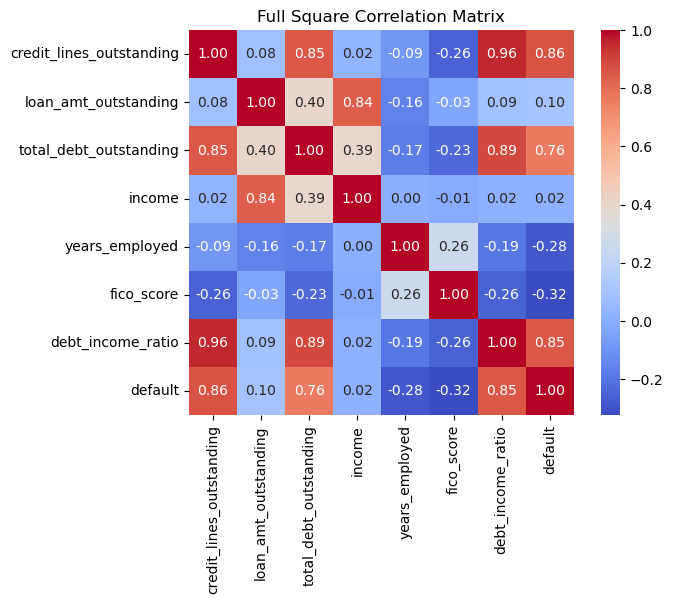

In [18]:
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Full Square Correlation Matrix')
plt.show()

In [21]:
test = df['default']


customer_id
8153374    0
7442532    1
2256073    0
4885975    0
4700614    0
Name: default, dtype: int64

In [25]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('default',axis = 1))#这个不会删除原始的数据，axis =1是删除列，不设置不行
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df['default'], test_size=0.2, random_state=42)
#random state是可以让每次的train test数据集都相同，随机数一样

array([[-0.83795996, -0.81216178, -0.67943488, ...,  0.28542543,
         1.22730946, -0.68899362],
       [-0.26448613,  0.39261009,  0.00634349, ..., -0.9910747 ,
         1.0294688 ,  0.16726717],
       [-0.83795996,  0.86880779, -0.55745299, ...,  0.92367549,
         1.09541569, -0.74938476],
       ...,
       [-0.83795996, -0.03803805, -0.32391523, ..., -0.9910747 ,
        -1.01488465, -0.52150588],
       [ 0.88246152,  0.52047561,  1.36973422, ..., -1.62932476,
        -1.37759252,  1.15117823],
       [-0.26448613,  0.07872706, -0.2260302 , ...,  2.83842568,
        -0.6686635 , -0.44935038]])

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
# 初始化模型
logreg = LogisticRegression(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
gboost = GradientBoostingClassifier(random_state=42)

# 训练逻辑回归模型
logreg.fit(X_train, y_train)

# 训练决策树模型
decision_tree.fit(X_train, y_train)

# 训练随机森林模型
random_forest.fit(X_train, y_train)

# 训练梯度提升机模型
gboost.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [30]:
# 逻辑回归性能
logreg_pred = logreg.predict(X_test)
logreg_roc_auc = roc_auc_score(y_test, logreg_pred)
print(f"Logistic Regression ROC-AUC: {logreg_roc_auc}")

# 决策树性能
decision_tree_pred = decision_tree.predict(X_test)
decision_tree_roc_auc = roc_auc_score(y_test, decision_tree_pred)
print(f"Decision Tree ROC-AUC: {decision_tree_roc_auc}")

# 随机森林性能
random_forest_pred = random_forest.predict(X_test)
random_forest_roc_auc = roc_auc_score(y_test, random_forest_pred)
print(f"Random Forest ROC-AUC: {random_forest_roc_auc}")

# 梯度提升机性能
gboost_pred = gboost.predict(X_test)
gboost_roc_auc = roc_auc_score(y_test, gboost_pred)
print(f"Gradient Boosting ROC-AUC: {gboost_roc_auc}")


Logistic Regression ROC-AUC: 0.9913793103448276
Decision Tree ROC-AUC: 0.984647658011188
Random Forest ROC-AUC: 0.9858583117642147
Gradient Boosting ROC-AUC: 0.990168656591801


ROC曲线（受试者工作特征曲线）是一个用来展示分类模型性能的图形化工具。ROC曲线下方的面积（AUC）越大，模型的分类性能越好。ROC曲线通过绘制不同阈值下的真正类率（True Positive Rate, TPR）与假正类率（False Positive Rate, FPR）来展示模型性能。

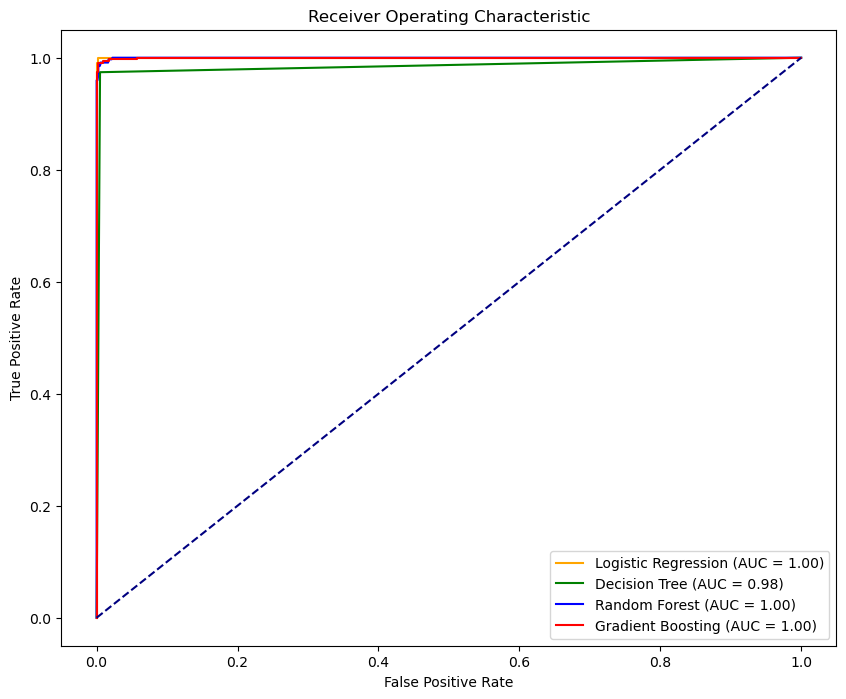

In [31]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 计算各个模型的ROC曲线
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

fpr_dtree, tpr_dtree, _ = roc_curve(y_test, decision_tree.predict_proba(X_test)[:, 1])
roc_auc_dtree = auc(fpr_dtree, tpr_dtree)

fpr_rf, tpr_rf, _ = roc_curve(y_test, random_forest.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_gboost, tpr_gboost, _ = roc_curve(y_test, gboost.predict_proba(X_test)[:, 1])
roc_auc_gboost = auc(fpr_gboost, tpr_gboost)

# 绘制ROC曲线
plt.figure(figsize=(10, 8))
plt.plot(fpr_logreg, tpr_logreg, color='orange', label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_dtree, tpr_dtree, color='green', label=f'Decision Tree (AUC = {roc_auc_dtree:.2f})')
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_gboost, tpr_gboost, color='red', label=f'Gradient Boosting (AUC = {roc_auc_gboost:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


交叉验证：运行交叉验证来确保这些评分的稳定性和可靠性。

超参数调优：使用网格搜索或随机搜索等技术来寻找每个模型的最佳超参数组合。

你可以使用cross_val_score函数。这个函数会对数据进行多次拆分，每次拆分都会产生不同的训练集和验证集，然后对模型进行评估。

对于超参数调优，你可以使用网格搜索(GridSearchCV)或随机搜索(RandomizedSearchCV)。网格搜索会遍历所有的参数组合，而随机搜索则在给定的参数范围内随机选择组合。

In [33]:
from sklearn.model_selection import cross_val_score

# 对逻辑回归模型进行交叉验证
logreg_cv_scores = cross_val_score(logreg, df_scaled, df['default'], cv=5, scoring='roc_auc')

# 打印交叉验证的平均ROC-AUC分数
print(f"Logistic Regression CV ROC-AUC: {logreg_cv_scores.mean():.2f} ± {logreg_cv_scores.std():.2f}")







Logistic Regression CV ROC-AUC: 1.00 ± 0.00


In [34]:

# 对逻辑回归模型进行交叉验证
decision_tree_cv_scores = cross_val_score(decision_tree, df_scaled, df['default'], cv=5, scoring='roc_auc')

# 打印交叉验证的平均ROC-AUC分数
print(f"decision_tree CV ROC-AUC: {decision_tree_cv_scores.mean():.2f} ± {decision_tree_cv_scores.std():.2f}")


decision_tree CV ROC-AUC: 0.99 ± 0.01


In [36]:

# 对逻辑回归模型进行交叉验证
random_forest_cv_scores = cross_val_score(random_forest, df_scaled, df['default'], cv=5, scoring='roc_auc')

# 打印交叉验证的平均ROC-AUC分数
print(f"random_forest CV ROC-AUC: {random_forest_cv_scores.mean():.2f} ± {random_forest_cv_scores.std():.2f}")


random_forest CV ROC-AUC: 1.00 ± 0.00


In [37]:

# 对逻辑回归模型进行交叉验证
gboost_cv_scores = cross_val_score(gboost, df_scaled, df['default'], cv=5, scoring='roc_auc')

# 打印交叉验证的平均ROC-AUC分数
print(f"gboost CV ROC-AUC: {gboost_cv_scores.mean():.2f} ± {gboost_cv_scores.std():.2f}")


gboost CV ROC-AUC: 1.00 ± 0.00


In [38]:
from sklearn.model_selection import GridSearchCV

# 设置想要优化的超参数和它们的范围
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,6,8],
    'criterion' :['gini', 'entropy']
}

# 创建GridSearchCV对象
CV_rfc = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='roc_auc')

# 运行网格搜索
CV_rfc.fit(df_scaled, df['default'])

# 打印最佳参数组合
print(CV_rfc.best_params_)

# 打印最佳参数的ROC-AUC分数
print(f"Random Forest best CV ROC-AUC: {CV_rfc.best_score_:.2f}")


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/A

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 300}
Random Forest best CV ROC-AUC: 1.00


预期损失计算：¶
预期损失（EL）通常计算为违约概率（PD）、违约损失率（LGD）和违约时暴露额（EAD）的乘积。、

在这种情况下，你假设恢复率为10%，这意味着违约损失率为90%。

对于给定的贷款，EL = PD * LGD * EAD。

模型部署：
一旦选定了最佳模型，应该在完整数据集上重新训练。

实施模型到生产环境中，可以输入贷款属性并输出预期损失。

假设我选择随机森林，之后怎么做



In [39]:
# 假设你已经有了最佳超参数设置，例如：
best_params = CV_rfc.best_params_

# 创建一个新的随机森林模型实例，使用最佳超参数
final_model = RandomForestClassifier(**best_params, random_state=42)

# 使用整个数据集重新训练模型
final_model.fit(df_scaled, df['default'])


RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=300,
                       random_state=42)

In [40]:
def calculate_expected_loss(model, features, EAD, LGD=0.9):
    # 获取违约概率
    PD = model.predict_proba(features)[:, 1]#sklearn 所有的函数都有这个predict——proba
    # 计算预期损失
    EL = PD * LGD * EAD
    return EL


In [52]:
# 假设 `features` 是你要评估的贷款的特征数组或DataFrame，已经过预处理和标准化
# 假设 `EAD` 是这笔贷款的违约时的暴露额
last_row = df_scaled[-1]
EAD = df['loan_amt_outstanding'].iloc[-1]
features = last_row.reshape(1, -1)



0

In [54]:
# 计算预期损失
expected_loss = calculate_expected_loss(final_model, features, EAD)
expected_loss 

array([0.])